## This notebook shows how to open data files (produced in DD4Hep), and plot hit distributions. It uses awkard arrays. 

In [1]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak
import mplhep as hep
#hep.set_style(hep.style.CMS)
#hep.set_style("CMS")
import matplotlib.colors as mcolors


## Get data, transform into akward arrays

In [23]:
input_file = 'rec_piplus_1k.root'
#input_file = "rec_pionplus_300k.root"
events = ur.open("%s:events"%(input_file))
#events.show()
events.keys()
arrays = events.arrays()


## Hit postion distributions

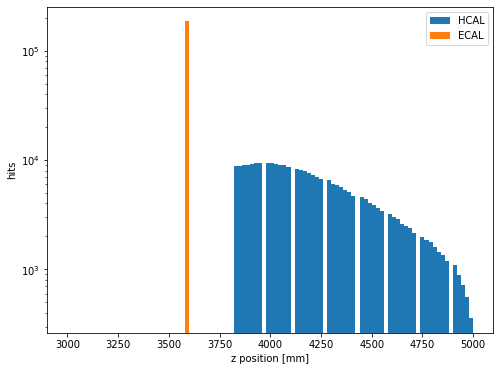

In [3]:
fig = plt.figure( figsize=(8, 6))

#plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.x']),bins=60)
#plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.y']),bins=60)
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.position.z']),bins=100, range=(3000,5000),label='HCAL')
plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.position.z']),bins=100,range=(3000,5000), label='ECAL')
plt.yscale('log')
plt.xlabel('z position [mm]')
plt.ylabel('hits')
plt.legend()
plt.show()

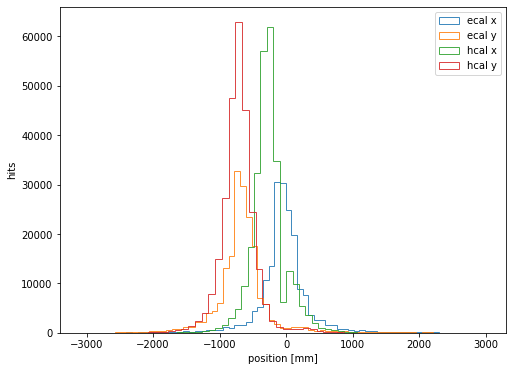

In [4]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.local.x']),bins=60,label='ecal x',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.local.y']),bins=60, label='ecal y',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.x']),bins=60,label='hcal x',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.y']),bins=60, label='hcal y',alpha=0.85,histtype='step')
plt.legend()
#plt.yscale('log')
plt.xlabel('position [mm]')
plt.ylabel('hits')
plt.show()

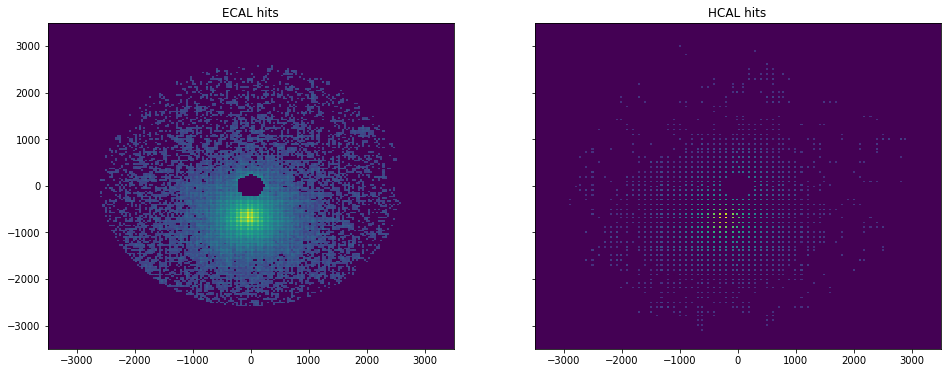

In [5]:
fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=True,sharey=True)
x = ak.flatten(arrays['EcalEndcapPHitsReco.local.x'])
y = ak.flatten(arrays['EcalEndcapPHitsReco.local.y'])
ax[0].hist2d(np.array(x),np.array(y),bins=200, range=([-3500,3500],[-3500,3500]),norm=mcolors.PowerNorm(0.2))

x = ak.flatten(arrays['HcalEndcapPHitsReco.local.x'])
y = ak.flatten(arrays['HcalEndcapPHitsReco.local.y'])
ax[1].hist2d(np.array(x),np.array(y),bins=200, range=([-3500,3500],[-3500,3500]),norm=mcolors.PowerNorm(0.2))


ax[1].set_title('HCAL hits')
ax[0].set_title('ECAL hits')

plt.show()

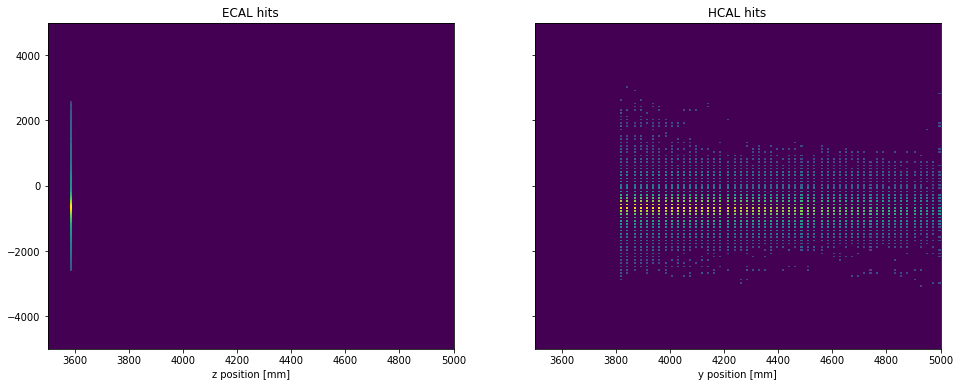

In [6]:
fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=True,sharey=True)
x = ak.flatten(arrays['EcalEndcapPHitsReco.position.z'])
y = ak.flatten(arrays['EcalEndcapPHitsReco.local.y'])
ax[0].hist2d(np.array(x),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))

x = ak.flatten(arrays['HcalEndcapPHitsReco.position.z'])
y = ak.flatten(arrays['HcalEndcapPHitsReco.local.y'])
ax[1].hist2d(np.array(x),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))


ax[0].set_xlabel('z position [mm]')
ax[1].set_xlabel('y position [mm]')

ax[1].set_title('HCAL hits')
ax[0].set_title('ECAL hits')

plt.show()

## Hit energy distributions

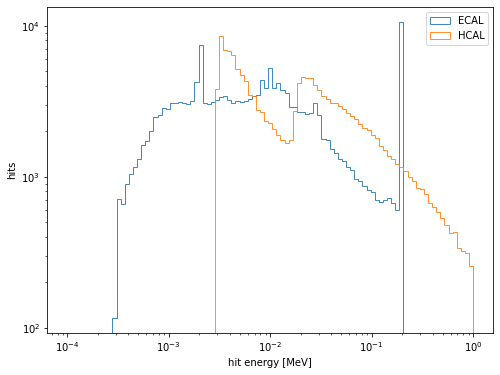

In [7]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.energy']),bins=np.geomspace(0.0001,1,100),label='ECAL',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.energy']),bins=np.geomspace(0.0001,1,100), label='HCAL',alpha=0.85,histtype='step')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('hits')
plt.xlabel('hit energy [MeV]')
plt.show()

In [8]:
HCALhits = arrays['HcalEndcapPHitsReco.energy'][:,:]
mask = HCALhits<1e10
HCALhits = HCALhits[mask]
HCAL_total = ak.sum(HCALhits,axis=-1)
HCAL_average = ak.mean(HCALhits,axis=-1)
HCAL_nhits = ak.num(HCALhits)

print('total HCAL energy' , HCAL_total)
print('Average hit energy in HCAL' , HCAL_average)


ECALhits = arrays['EcalEndcapPHitsReco.energy'][:,:]
mask = ECALhits<1e10
ECALhits = ECALhits[mask]
ECAL_total = ak.sum(ECALhits,axis=-1)
ECAL_average = ak.mean(ECALhits,axis=-1)
ECAL_nhits = ak.num(ECALhits)

print('total ECAL energy' , ECAL_total)
print('Average hit energy in ECAL' , ECAL_average)

print(np.shape(HCAL_total),np.shape(ECAL_total))

total HCAL energy [4.63, 15.8, 15, 7.77, 5.09, 14.1, 16.6, ... 3.86, 5.02, 10.1, 1.9, 13.6, 7.67, 14.1]
Average hit energy in HCAL [0.0336, 0.0692, 0.0561, 0.0835, 0.0382, ... 0.0538, 0.0365, 0.0723, 0.0502, 0.0468]
total ECAL energy [19, 0.484, 0.714, 0.434, 5.58, 5.41, 1.39, ... 10.2, 6.22, 7.57, 2.6, 6.69, 0.533]
Average hit energy in ECAL [0.0409, 0.0403, 0.0193, 0.0542, 0.0239, ... 0.0208, 0.0394, 0.0163, 0.0352, 0.0222]
(1000,) (1000,)


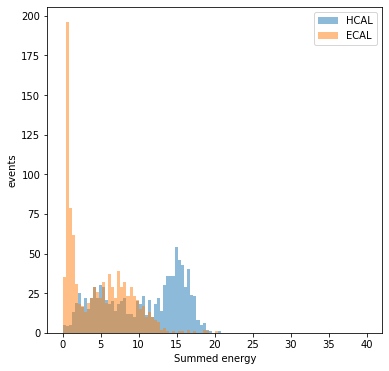

In [9]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_total,bins=100,alpha=0.5,range=(0,40),label='HCAL')
plt.hist(ECAL_total,bins=100,alpha=0.5,range=(0,40),label='ECAL')

plt.xlabel('Summed energy')
plt.ylabel('events')
plt.legend()

plt.show()


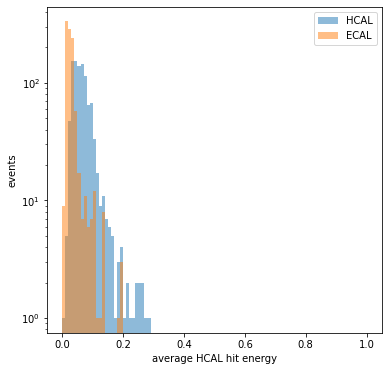

In [10]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_average,bins=100,alpha=0.5,range=(0,1),label='HCAL')
plt.hist(ECAL_average,bins=100,alpha=0.5,range=(0,1),label='ECAL')

plt.xlabel('average HCAL hit energy')
plt.ylabel('events')
plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()


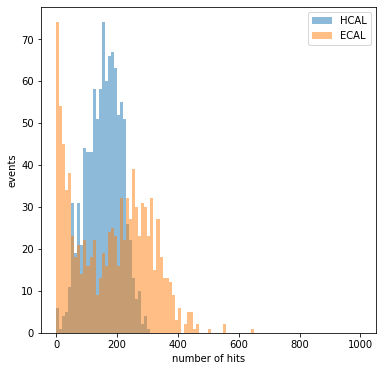

In [11]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_nhits,bins=100,alpha=0.5,range=(0,1000),label='HCAL')
plt.hist(ECAL_nhits,bins=100,alpha=0.5,range=(0,1000),label='ECAL')

plt.xlabel('number of hits')
plt.ylabel('events')
#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()


In [12]:
pz = ak.to_numpy(arrays['MCParticles.momentum.z'][:,-1])
py = ak.to_numpy(arrays['MCParticles.momentum.y'][:,-1])
px = ak.to_numpy(arrays['MCParticles.momentum.x'][:,-1])
mass = ak.to_numpy(arrays['MCParticles.mass'][:,-1])
genStat = ak.to_numpy(arrays['MCParticles.generatorStatus'][:,-1])
p = np.sqrt(px*px + py*py+ pz*pz)
gen_E = np.sqrt(p*p + mass*mass)-mass

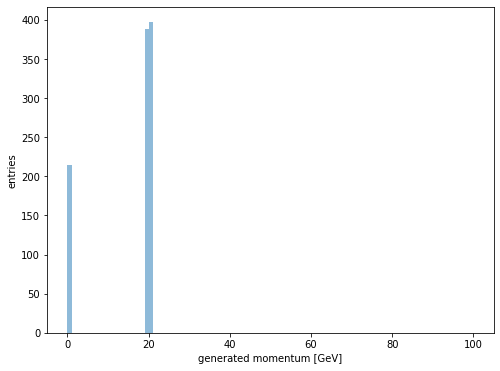

1000


In [14]:
fig = plt.figure( figsize=(8, 6))

plt.hist(p,range=(0,100),bins=100,alpha=0.5)
#plt.hist(gen_E,range=(0,100),bins=100,alpha=0.5)

plt.xlabel('generated momentum [GeV]')
plt.ylabel('entries')
plt.show()
print(len(p))

# Cluster Sums vs $E_\mathrm{Generated}$

In [15]:
ecal_cluster_sum = np.sum(arrays['EcalEndcapPHitsReco.energy'],axis=-1)
hcal_cluster_sum = np.sum(arrays['HcalEndcapPHitsReco.energy'],axis=-1)
cluster_sum = ecal_cluster_sum + hcal_cluster_sum

cluster_total = ECAL_total+HCAL_total
p = np.sqrt(px*px + py*py+ pz*pz)
gen_E = np.sqrt(p*p + mass*mass)-mass

HCAL_total = ak.sum(HCALhits,axis=-1)
ECAL_total = ak.sum(ECALhits,axis=-1)

In [16]:
print(np.shape(ecal_cluster_sum))
print(np.shape(ECAL_total))
print(np.shape(gen_E))

(1000,)
(1000,)
(1000,)


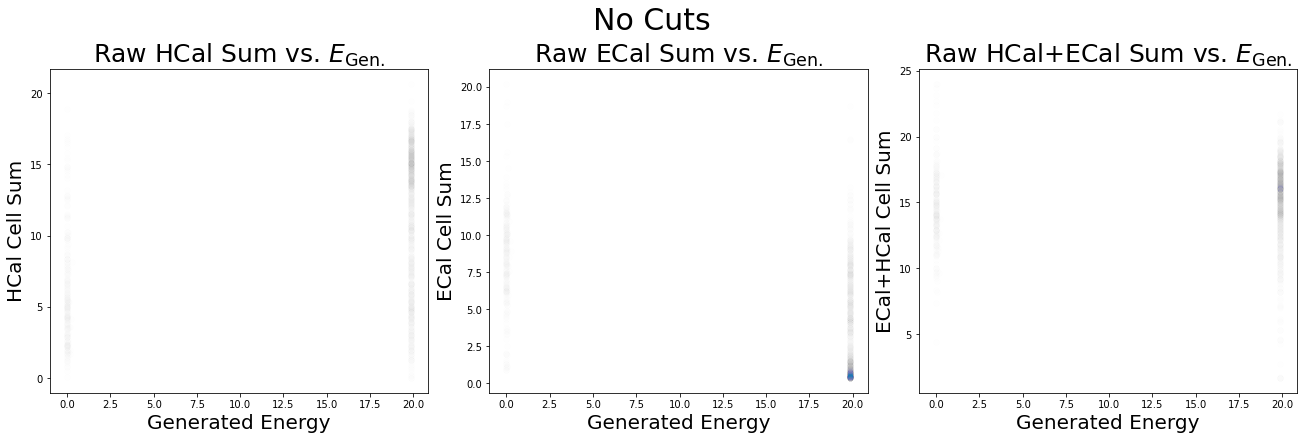

In [17]:
mask = np.full(len(HCAL_total),True)

gen_E = gen_E[mask]
HCAL_total = HCAL_total[mask]
ECAL_total = ECAL_total[mask]
cluster_total = ECAL_total+HCAL_total
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), constrained_layout=True)

axes[0].scatter(gen_E,HCAL_total,alpha=0.005)
axes[0].set_xlabel("Generated Energy",fontsize=20)
axes[0].set_ylabel("HCal Cell Sum",fontsize=20)
axes[0].set_title("Raw HCal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)

axes[1].scatter(gen_E,ECAL_total,alpha=0.005)
axes[1].set_xlabel("Generated Energy",fontsize=20)
axes[1].set_ylabel("ECal Cell Sum",fontsize=20)
axes[1].set_title("Raw ECal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)

axes[2].scatter(gen_E,cluster_total,alpha=0.005)
axes[2].set_xlabel("Generated Energy",fontsize=20)
axes[2].set_ylabel("ECal+HCal Cell Sum",fontsize=20)
axes[2].set_title("Raw HCal+ECal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)
_ = plt.suptitle("No Cuts",fontsize=30)

### Apply cell cuts

In [18]:
mip_E = 0.00006 #minimum ionizing particle
spikey_E = 1e10
max_T = 200
    
ecal_time_mask = arrays['EcalEndcapPHitsReco.time'] < max_T
ecal_spike_mask = arrays['EcalEndcapPHitsReco.energy'] < spikey_E
ecal_mip_mask = arrays['EcalEndcapPHitsReco.energy'] > mip_E
hcal_time_mask = arrays['HcalEndcapPHitsReco.time'] < max_T
hcal_mip_mask = arrays['HcalEndcapPHitsReco.energy'] > mip_E
hcal_spike_mask = arrays['HcalEndcapPHitsReco.energy'] < spikey_E

e_cell_cuts = [ecal_time_mask,ecal_spike_mask,ecal_mip_mask]
e_cell_mask = np.full(len(ecal_time_mask),True)
h_cell_cuts = [hcal_time_mask,hcal_spike_mask,hcal_mip_mask]
h_cell_mask = np.full(len(hcal_time_mask),True)

for e_cut,h_cut in zip(e_cell_cuts,h_cell_cuts):
    e_cell_mask = np.logical_and(e_cell_mask,e_cut)
    h_cell_mask = np.logical_and(h_cell_mask,h_cut)
    

ecal_cut_cluster_sum = np.sum(arrays['EcalEndcapPHitsReco.energy'][e_cell_mask],axis=-1)
hcal_cut_cluster_sum = np.sum(arrays['HcalEndcapPHitsReco.energy'][h_cell_mask],axis=-1)
cluster_cut_total = ecal_cut_cluster_sum+hcal_cut_cluster_sum

print(hcal_cut_cluster_sum)
print(HCAL_total)

[4.57, 15.7, 14.4, 7.73, 4.99, 13.8, 16.4, ... 4.88, 9.57, 1.88, 13.4, 7.59, 13.6]
[4.63, 15.8, 15, 7.77, 5.09, 14.1, 16.6, ... 3.86, 5.02, 10.1, 1.9, 13.6, 7.67, 14.1]


### Apply Cluster Cuts

[False  True  True  True False  True  True  True  True  True  True  True
  True  True False False  True False  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True False  True  True False  True  True False  True  True  True  True
  True  True  True  True  True False  True  True False  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True False
  True  True  True False  True False  True  True False  True  True  True
  True  True  True  True  True  True False  True  True False False  True
 False  True  True  True False  True False  True  True  True  True  True
  True  True  True False  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
 False False  True  True False  True  True False  T

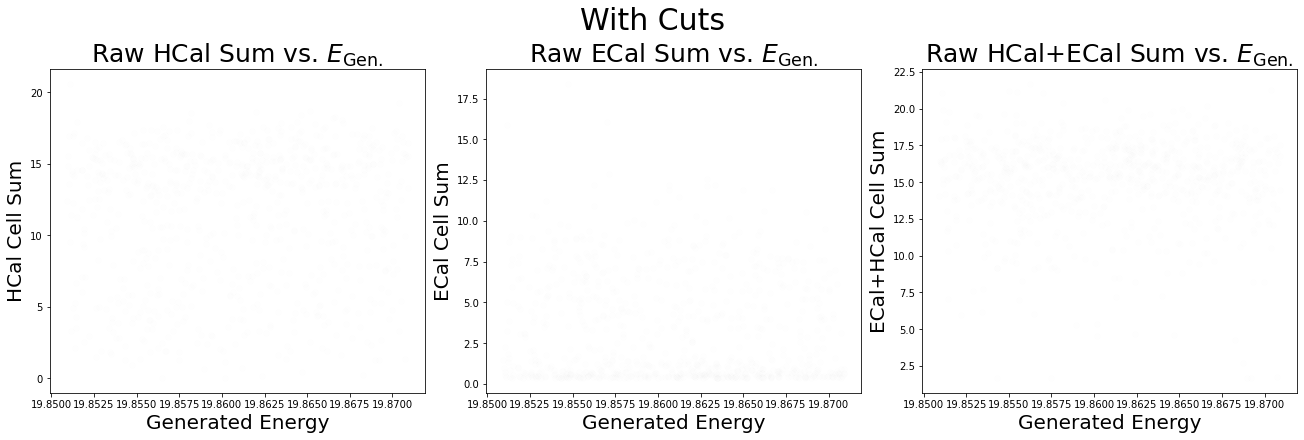

In [19]:
minGenE = 0.5
minSum = 0.0
gen_code_keep = 1

mask = np.full(len(HCAL_total),True)
mask = np.logical_and(mask, gen_E > minGenE)
mask = np.logical_and(mask,hcal_cut_cluster_sum > minSum)
mask = np.logical_and(mask,ecal_cut_cluster_sum > minSum)
mask = np.logical_and(mask, genStat==gen_code_keep)
print(genStat==gen_code_keep)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), constrained_layout=True)

axes[0].scatter(gen_E[mask],hcal_cut_cluster_sum[mask],alpha=0.005)
axes[0].set_xlabel("Generated Energy",fontsize=20)
axes[0].set_ylabel("HCal Cell Sum",fontsize=20)
axes[0].set_title("Raw HCal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)

axes[1].scatter(gen_E[mask],ecal_cut_cluster_sum[mask],alpha=0.005)
axes[1].set_xlabel("Generated Energy",fontsize=20)
axes[1].set_ylabel("ECal Cell Sum",fontsize=20)
axes[1].set_title("Raw ECal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)

axes[2].scatter(gen_E[mask],cluster_total[mask],alpha=0.005)
axes[2].set_xlabel("Generated Energy",fontsize=20)
axes[2].set_ylabel("ECal+HCal Cell Sum",fontsize=20)
axes[2].set_title("Raw HCal+ECal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)
_ = plt.suptitle("With Cuts",fontsize=30)

(array([0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 2., 0., 0., 0., 1.,
        0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 1.,
        1., 0., 1., 0., 2., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 

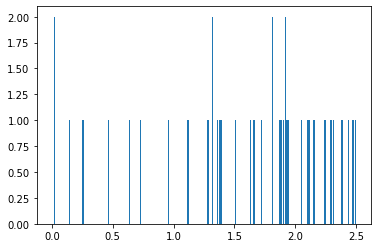

In [20]:
plt.hist(hcal_cut_cluster_sum[mask],bins=np.linspace(0,2.5,250))